<a href="https://colab.research.google.com/github/bella0826/-/blob/main/%E8%98%AD%E8%8A%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd
import numpy as np
import cv2
import os
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt


image_path = "/content/drive/MyDrive/data/training/"
label_path = "/content/drive/MyDrive/data/training/label.csv"

In [37]:
def load_data():
  x_train = []
  y_train = []
  label_df = pd.read_csv(label_path, index_col = "filename")
  for p in os.listdir(image_path):
    if p != "label.csv":
      path = image_path + p
      img = cv2.imread(path)
      image = cv2.resize(img, (200,200), interpolation = cv2.INTER_AREA)
      x_train.append(np.array(image))
      y_train.append(label_df.loc[str(p),"category"])
      #print(p,label_df.loc[str(p),"category"])
  return x_train,y_train

In [38]:
def build_model():
  model = Sequential()
  model.add(Conv2D(32,(5,5), activation = 'relu', padding = 'same', input_shape = (200,200,3)))
  model.add(MaxPooling2D(2, data_format = 'channels_last'))

  model.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
  model.add(MaxPooling2D(2, data_format = 'channels_last'))

  model.add(Flatten())
  model.add(Dense(256,activation = 'relu'))
  model.add(Dense(219,activation = 'softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

  print(model.summary())

  return model

In [39]:
def show_train_history(train_history,train): #validation
  
  if train == 'accuracy':
    plt.plot(train_history.history[train])
    #plt.plot(train_history.history[validation])
    plt.title('Train history(acc)')
    plt.ylabel('train')
    plt.xlabel('epoch')
  else:
    plt.plot(train_history.history[train])
    #plt.plot(train_history.history[validation])
    plt.title('Train history(loss)')
    plt.ylabel('train')
    plt.xlabel('epoch')

  plt.legend(['train','validation'],loc='upper left')
  plt.show()

In [40]:
if __name__ == '__main__':
  x_train, y_train = load_data()
  x_train = np.array(x_train).astype('float32')
  y_train = np.array(y_train).astype('float32')
  x_train = x_train/255.0
  y_train = to_categorical(y_train,219)

  
  model = build_model()


  history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1)
  #history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = 32), validation_data = (x_test,y_test), epochs = 10 ,verbose = 1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 200, 200, 32)      2432      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 160000)            0         
                                                                 
 dense_10 (Dense)            (None, 256)              

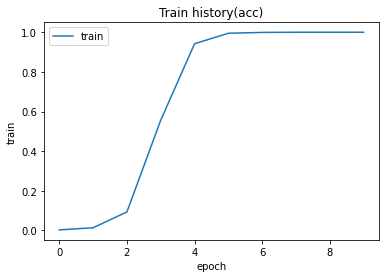

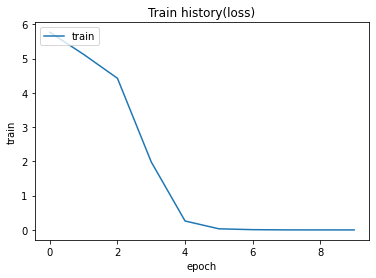

In [41]:
show_train_history(history,"accuracy")
show_train_history(history,"loss")